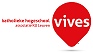<br>


**INTRODUCTION TO ARTIFICIAL INTELLIGENCE**<br>
Academiejaar 2021-2022<br>
Stefaan Haspeslagh<br>
Andy Louwyck<br>
Pieter Ideler

---



---



#**SEARCH EXERCISER**

Deze notebook legt aan de hand van enkele voorbeeldjes uit hoe we package `SearchExerciser` kunnen gebruiken om zelf oefeningen op zoekalgoritmes te verzinnen en op te lossen. Met deze package kunnen we zowel doolhofproblemen als grafeproblemen implementeren.

##Code

### Github repo clonen

We clonen package `SearchExerciser` van de Github repository https://github.com/alouwyck/SearchExerciser. Deze bevat 5 python-files die we terugvinden in directory "SearchExerciser".

In [1]:
import os, shutil

# # verwijder eerst directory 'SearchExerciser' als die al bestaat
# path = "SearchExerciser"
# if os.path.exists(path):
#     shutil.rmtree(path)

# # clone SearchExerciser repository van Github
# !git clone https://github.com/alouwyck/SearchExerciser

# # SearchExerciser package directory rechtstreeks onder current directory zetten
# for file in os.listdir(os.path.join(path, path)):
#     shutil.copyfile(os.path.join(path, path, file), os.path.join(path, file))
# shutil.rmtree(os.path.join(path, path))

### Import statements

We importeren de nodige klassen uit package `SearchExerciser`. Elke python-file in directory "SearchExerciser" komt overeen met een module waarvan we de klassen kunnen importeren. Dit zijn de klassen die we nodig hebben: 
- klassen `DFS`, `BFS`, `NDS` en `IDS` de module `search`, die de blinde zoekalgoritmen depth-first search, breadth-first search, non-deterministic search en iterative deepening search implementeren;
- klasse `Maze` uit module `maze` en de `ProductionRule` subklassen `Left`, `Right`, `Up` en `Down`;
- klassen `Graph` en `ProductionRule` nodig uit module `graph`.

In [2]:
from SearchExerciser.search import DFS, BFS, NDS, IDS, HC, GS
from SearchExerciser.maze import Maze, Left, Right, Up, Down
from SearchExerciser.graph import Graph, ProductionRule

## Voorbeelden doolhofproblemen

Met package `SearchExerciser` kunnen we doolhofproblemen implementeren en oplossen.

### 3 x 3 doolhof

We creëren eerst een eenvoudig 3x3 doolhof. We gebruiken hiervoor de statische methode `Maze.create()`.

In [3]:
maze = Maze.create(["*..", ".#.", "..o"])
maze

*..
.#.
..o

We kunnen het doolhof ook plotten met methode `plot()`.

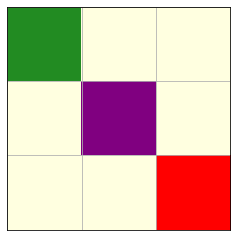

In [4]:
maze.plot()

Met methode `search()` kunnen we een pad van start (groen vakje) naar goal (rood vakje) vinden. We moeten wel een klasse meegeven die één van de geziene zoekalgoritmen implementeert: `DFS`, `BFS`, `NDS` of `IDS`. We beginnen met `DFS`.  

In [5]:
path_to_goal = maze.search(DFS)

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0001900196075439453 seconds
Number of iterations: 4
Maximum length of queue: 2


De `search()` methode retourneert een `maze.Path` object als er een oplossing is gevonden (en anders `None`). Wanneer we de `plot()` methode aanroepen van dat object, dan wordt het gevonden pad in het doolhof geplot.

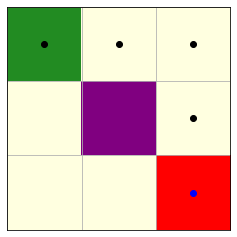

In [6]:
path_to_goal.plot()

We kunnen ook een "live" plot maken door methode `plot_live()` van het `maze.Path` object aan te roepen. Hieronder zoeken we het pad met non-deterministic search, vandaar dat we klasse `NDS` meegeven aan de `search()` methode, en we maken gebruik van "chaining" om direct ook een "live" plot te maken. Door `print_result` op `False` te zetten wordt het resultaat van het uitgevoerde zoekalgoritme niet uitgeprint.

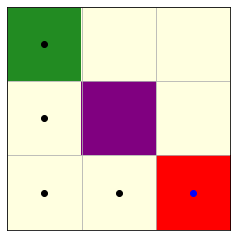

In [7]:
maze.search(NDS, print_result=False).plot_live()

We kunnen ook de queue en andere variabelen uitprinten na elke iteratie door `print_queue=True` mee te geven aan de `search()` methode. Dat is uiteraard zeer handig om de algoritmen in te oefenen. 

In [8]:
path_to_goal = maze.search(DFS, print_queue=True)

Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

Iteration 2
Path removed from queue:
xx.
.#.
..o
New paths:
xxx  
.#.  
..o  
Paths in queue:
xxx  x..  
.#.  x#.  
..o  ..o  

Iteration 3
Path removed from queue:
xxx
.#.
..o
New paths:
xxx  
.#x  
..o  
Paths in queue:
xxx  x..  
.#x  x#.  
..o  ..o  

Iteration 4
Path removed from queue:
xxx
.#x
..o
New paths:
xxx  
.#x  
..x  
Paths in queue:
xxx  x..  
.#x  x#.  
..x  ..o  

Path to goal found in new paths:
xxx
.#x
..x

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0011589527130126953 seconds
Number of iterations: 4
Maximum length of queue: 2


Laten we ook eens de queue uitprinten bij BFS.

In [9]:
path_to_goal = maze.search(BFS, print_queue=True)

Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

Iteration 2
Path removed from queue:
xx.
.#.
..o
New paths:
xxx  
.#.  
..o  
Paths in queue:
x..  xxx  
x#.  .#.  
..o  ..o  

Iteration 3
Path removed from queue:
x..
x#.
..o
New paths:
x..  
x#.  
x.o  
Paths in queue:
xxx  x..  
.#.  x#.  
..o  x.o  

Iteration 4
Path removed from queue:
xxx
.#.
..o
New paths:
xxx  
.#x  
..o  
Paths in queue:
x..  xxx  
x#.  .#x  
x.o  ..o  

Iteration 5
Path removed from queue:
x..
x#.
x.o
New paths:
x..  
x#.  
xxo  
Paths in queue:
xxx  x..  
.#x  x#.  
..o  xxo  

Iteration 6
Path removed from queue:
xxx
.#x
..o
New paths:
xxx  
.#x  
..x  
Paths in queue:
x..  xxx  
x#.  .#x  
xxo  ..x  

Path to goal found in new paths:
xxx
.#x
..x

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.0011019706726074219 seconds
Number of iterations: 6
Maximum length of queu

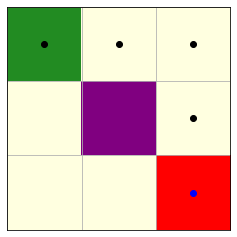

In [10]:
path_to_goal.plot()

Bij iterative deepening search (IDS) wordt dit gedaan voor elke iteratie waarin DFS met diepte limiet wordt toegepast.

In [11]:
path_to_goal = maze.search(IDS, print_queue=True)

--> DEPTH: 1
Initial queue:
x..  
.#.  
..o  

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.00010800361633300781 seconds
Number of iterations: 1
Maximum length of queue: 1

--> DEPTH: 2
Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

ALGORITHM: Depth-first search
RESULT: FAILURE
Elapsed time: 0.00022864341735839844 seconds
Number of iterations: 3
Maximum length of queue: 2

--> DEPTH: 3
Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
xx.  x..  
.#.  x#.  
..o  ..o  
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

Iteration 2
Path removed from queue:
xx.
.#.
..o
New paths:
xxx  
.#.  
..o  
Paths in queue:
xxx  x..  
.#.  x#.  
..o  ..o  

Iteration 4
Path removed from queue:
x..
x#.
..o
New paths:
x..  
x#.  
x.o  
Paths in queue:
x..  
x#.  
x.o  

ALGORITHM: Depth-first search
RESULT: FAILURE


De "final result" geeft dan de totale tijd van alle DFS berekeningen weer en het totaal aantal iteraties. Ook de maximale lengte van de queue is het maximum van alle DFS berekeningen.  

We passen ook nog even Hill Climbing toe als voorbeeld van een heuristisch zoekalgoritme. Vanaf hier moet je een functie meegeven die de heuristische waarde van een `State` berekent.

In [12]:
from SearchExerciser.maze import manhattan_distance_heuristic

In [13]:
path_to_goal = maze.search(HC, heuristic=manhattan_distance_heuristic, print_queue=True)

Initial queue:
x..  
.#.  
..o  

Iteration 1
Path removed from queue:
x..
.#.
..o
New paths:
[xx.
.#.
..o, x..
x#.
..o]
Paths in queue:
xx.  x..  
.#.  x#.  
..o  ..o  

Iteration 2
Path removed from queue:
xx.
.#.
..o
New paths:
[xxx
.#.
..o]
Paths in queue:
xxx  x..  
.#.  x#.  
..o  ..o  

Iteration 3
Path removed from queue:
xxx
.#.
..o
New paths:
[xxx
.#x
..o]
Paths in queue:
xxx  x..  
.#x  x#.  
..o  ..o  

Iteration 4
Path removed from queue:
xxx
.#x
..o
New paths:
[xxx
.#x
..x]
Paths in queue:
xxx  x..  
.#x  x#.  
..x  ..o  

Path to goal found in new paths:
xxx
.#x
..x

ALGORITHM: Hill Climbing 1 (DFS)
RESULT: SUCCES
Elapsed time: 0.0005841255187988281 seconds
Number of iterations: 4
Maximum length of queue: 2


### 7 x 7 doolhof

We nemen nu een 7x7 doolhof als voorbeeld.

In [14]:
maze = Maze.create(['......o',
                    '.#####.',
                    '.......',
                    '.#####.',
                    '.......',
                    '.#####.',
                    '*......'])

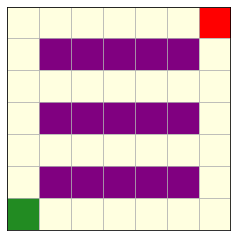

In [15]:
maze.plot()

We passen BFS toe, maar wijzigen de "production rules" in onder, boven, rechts, links.

In [16]:
path_to_goal = maze.search(BFS, rules=[Down(), Up(), Right(), Left()], print_queue=True)

Initial queue:
......o  
.#####.  
.......  
.#####.  
.......  
.#####.  
x......  

Iteration 1
Path removed from queue:
......o
.#####.
.......
.#####.
.......
.#####.
x......
New paths:
......o  ......o  
.#####.  .#####.  
.......  .......  
.#####.  .#####.  
.......  .......  
x#####.  .#####.  
x......  xx.....  
Paths in queue:
......o  ......o  
.#####.  .#####.  
.......  .......  
.#####.  .#####.  
.......  .......  
x#####.  .#####.  
x......  xx.....  

Iteration 2
Path removed from queue:
......o
.#####.
.......
.#####.
.......
x#####.
x......
New paths:
......o  
.#####.  
.......  
.#####.  
x......  
x#####.  
x......  
Paths in queue:
......o  ......o  
.#####.  .#####.  
.......  .......  
.#####.  .#####.  
.......  x......  
.#####.  x#####.  
xx.....  x......  

Iteration 3
Path removed from queue:
......o
.#####.
.......
.#####.
.......
.#####.
xx.....
New paths:
......o  
.#####.  
.......  
.#####.  
.......  
.#####.  
xxx....  
Paths in queue:
......o  ....

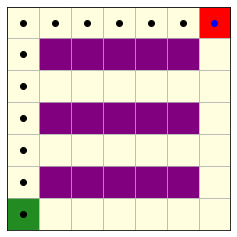

In [17]:
path_to_goal.plot()

Laten we ook nog eens NDS toepassen.

ALGORITHM: Non-deterministic search
RESULT: SUCCES
Elapsed time: 0.0009748935699462891 seconds
Number of iterations: 30
Maximum length of queue: 7


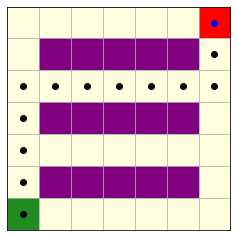

In [18]:
from random import seed
seed(0)  # random seed opgeven zodat we altijd hetzelfde resultaat krijgen
maze.search(NDS).plot()

### Random doolhof

Interessant is de statische methode `Maze.create_random()` om willekeurige doolhoven te creëren.

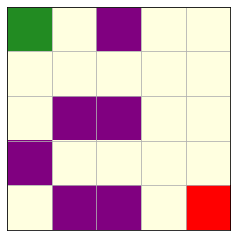

In [19]:
maze = Maze.create_random(size=5,         # aantal rijen = aantal kolommen 
                          num_of_walls=6, # aantal muren/barrières
                          seed=0)         # random seed
maze.plot()

DFS zal in dit geval niet het kortste pad vinden.

Initial queue:
x.#..  
.....  
.##..  
#....  
.##.o  

Iteration 1
Path removed from queue:
x.#..
.....
.##..
#....
.##.o
New paths:
xx#..  x.#..  
.....  x....  
.##..  .##..  
#....  #....  
.##.o  .##.o  
Paths in queue:
xx#..  x.#..  
.....  x....  
.##..  .##..  
#....  #....  
.##.o  .##.o  

Iteration 2
Path removed from queue:
xx#..
.....
.##..
#....
.##.o
New paths:
xx#..  
.x...  
.##..  
#....  
.##.o  
Paths in queue:
xx#..  x.#..  
.x...  x....  
.##..  .##..  
#....  #....  
.##.o  .##.o  

Iteration 3
Path removed from queue:
xx#..
.x...
.##..
#....
.##.o
New paths:
xx#..  xx#..  
xx...  .xx..  
.##..  .##..  
#....  #....  
.##.o  .##.o  
Paths in queue:
xx#..  xx#..  x.#..  
xx...  .xx..  x....  
.##..  .##..  .##..  
#....  #....  #....  
.##.o  .##.o  .##.o  

Iteration 4
Path removed from queue:
xx#..
xx...
.##..
#....
.##.o
New paths:
xx#..  
xx...  
x##..  
#....  
.##.o  
Paths in queue:
xx#..  xx#..  x.#..  
xx...  .xx..  x....  
x##..  .##..  .##..  
#....  #.

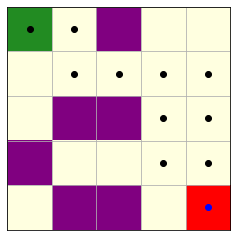

In [20]:
path_to_goal = maze.search(DFS, print_queue=True)
path_to_goal.plot()

BFS vindt wel het kortste pad.

Initial queue:
x.#..  
.....  
.##..  
#....  
.##.o  

Iteration 1
Path removed from queue:
x.#..
.....
.##..
#....
.##.o
New paths:
xx#..  x.#..  
.....  x....  
.##..  .##..  
#....  #....  
.##.o  .##.o  
Paths in queue:
xx#..  x.#..  
.....  x....  
.##..  .##..  
#....  #....  
.##.o  .##.o  

Iteration 2
Path removed from queue:
xx#..
.....
.##..
#....
.##.o
New paths:
xx#..  
.x...  
.##..  
#....  
.##.o  
Paths in queue:
x.#..  xx#..  
x....  .x...  
.##..  .##..  
#....  #....  
.##.o  .##.o  

Iteration 3
Path removed from queue:
x.#..
x....
.##..
#....
.##.o
New paths:
x.#..  x.#..  
xx...  x....  
.##..  x##..  
#....  #....  
.##.o  .##.o  
Paths in queue:
xx#..  x.#..  x.#..  
.x...  xx...  x....  
.##..  .##..  x##..  
#....  #....  #....  
.##.o  .##.o  .##.o  

Iteration 4
Path removed from queue:
xx#..
.x...
.##..
#....
.##.o
New paths:
xx#..  xx#..  
xx...  .xx..  
.##..  .##..  
#....  #....  
.##.o  .##.o  
Paths in queue:
x.#..  x.#..  xx#..  xx#..  
xx...  x...

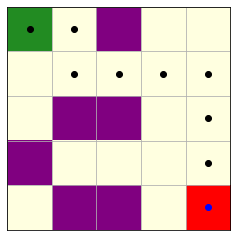

In [21]:
path_to_goal = maze.search(BFS, print_queue=True)
path_to_goal.plot()

Ook IDS vindt het kortste pad.

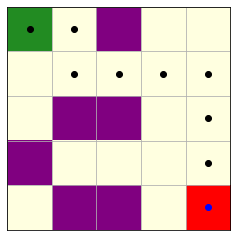

In [22]:
path_to_goal = maze.search(IDS, print_result=False)
path_to_goal.plot()

## Voorbeelden grafeproblemen

Met de `SearchExerciser` package kunnen we ook grafeproblemen implementeren en oplossen.

### Running example uit de cursus

We creëren als eerste voorbeeld de grafe uit de cursus. We gebruiken daarvoor de statische methode `Graph.create()`. We moeten enkel een list met edges meegeven, waarbij elke edge wordt gedefineerd als een tuple van 2 nodes.

In [23]:
graph = Graph.create(edges=[("S", "A"), ("S", "D"), ("A", "D"), ("A", "B"), ("D", "E"), 
                            ("B", "E"), ("B", "C"), ("E", "F"), ("F", "G")])

We kunnen de grafe plotten. Dan moeten we wel de coördinaten van de nodes van onze grafe in een dictionary stoppen en die dictionary meegeven aan de `plot()` methode van ons `Graph` object. 

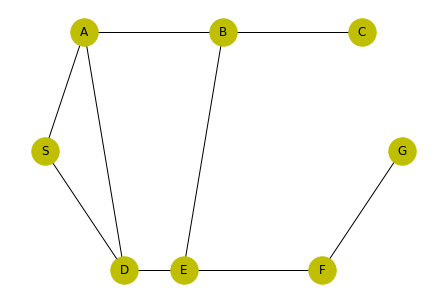

In [24]:
pos = dict(S=[0, 0.5], 
           A=[1, 1],
           D=[2, 0],
           E=[3.5, 0],
           B=[4.5, 1],
           F=[7, 0],
           C=[8, 1],
           G=[9, 0.5])

graph.plot(pos)

Bij het genereren van de "children" worden de nodes standaard alfabetisch gerangschikt. Op die manier zal DFS niet het kortste pad vinden.

In [25]:
path_to_goal = graph.search(DFS, print_queue=True)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SAB,SAD,SD]

Iteration 3
Path removed from queue:
SAB
New paths:
[SABC,SABE]
Paths in queue:
[SABC,SABE,SAD,SD]

Iteration 4
Path removed from queue:
SABC
New paths:
[]
Paths in queue:
[SABE,SAD,SD]

Iteration 5
Path removed from queue:
SABE
New paths:
[SABED,SABEF]
Paths in queue:
[SABED,SABEF,SAD,SD]

Iteration 6
Path removed from queue:
SABED
New paths:
[]
Paths in queue:
[SABEF,SAD,SD]

Iteration 7
Path removed from queue:
SABEF
New paths:
[SABEFG]
Paths in queue:
[SABEFG,SAD,SD]

Path to goal found in new paths:
SABEFG

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0008251667022705078 seconds
Number of iterations: 7
Maximum length of queue: 4


BFS vindt natuurlijk wel het kortste pad.

In [26]:
path_to_goal = graph.search(BFS, print_queue=True)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SA,SD]
Paths in queue:
[SA,SD]

Iteration 2
Path removed from queue:
SA
New paths:
[SAB,SAD]
Paths in queue:
[SD,SAB,SAD]

Iteration 3
Path removed from queue:
SD
New paths:
[SDA,SDE]
Paths in queue:
[SAB,SAD,SDA,SDE]

Iteration 4
Path removed from queue:
SAB
New paths:
[SABC,SABE]
Paths in queue:
[SAD,SDA,SDE,SABC,SABE]

Iteration 5
Path removed from queue:
SAD
New paths:
[SADE]
Paths in queue:
[SDA,SDE,SABC,SABE,SADE]

Iteration 6
Path removed from queue:
SDA
New paths:
[SDAB]
Paths in queue:
[SDE,SABC,SABE,SADE,SDAB]

Iteration 7
Path removed from queue:
SDE
New paths:
[SDEB,SDEF]
Paths in queue:
[SABC,SABE,SADE,SDAB,SDEB,SDEF]

Iteration 8
Path removed from queue:
SABC
New paths:
[]
Paths in queue:
[SABE,SADE,SDAB,SDEB,SDEF]

Iteration 9
Path removed from queue:
SABE
New paths:
[SABED,SABEF]
Paths in queue:
[SADE,SDAB,SDEB,SDEF,SABED,SABEF]

Iteration 10
Path removed from queue:
SADE
New paths:
[SADEB,SADEF]
Pat

We kunnen wel de volgorde waarin de child nodes worden doorlopen aanpassen met de statische methode `ProductionRule.create_all()`. We moeten daar gewoon inputparameter `reverse` op `True` zetten. De gecreëerde `rules` geven we dan mee aan de `search()` methode.

In het volgende voorbeeld passen we DFS toe en we doorlopen de nodes aflopend alfabetisch, dus van Z naar A.

In [27]:
rules = ProductionRule.create_all(graph, reverse=True)  # vertices aflopend alfabetisch doorlopen
graph.search(DFS, rules=rules, print_queue=True)

Initial queue:
[S]

Iteration 1
Path removed from queue:
S
New paths:
[SD,SA]
Paths in queue:
[SD,SA]

Iteration 2
Path removed from queue:
SD
New paths:
[SDE,SDA]
Paths in queue:
[SDE,SDA,SA]

Iteration 3
Path removed from queue:
SDE
New paths:
[SDEF,SDEB]
Paths in queue:
[SDEF,SDEB,SDA,SA]

Iteration 4
Path removed from queue:
SDEF
New paths:
[SDEFG]
Paths in queue:
[SDEFG,SDEB,SDA,SA]

Path to goal found in new paths:
SDEFG

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.00038814544677734375 seconds
Number of iterations: 4
Maximum length of queue: 4


SDEFG

Zo vinden we toevallig wel het kortste pad met DFS.

### Examenvraag jaar '20-'21

Op het examen van Intro to AI van het academiejaar '20-'21 werden West-Vlaamse steden in een grafe weergegeven. Op die grafe moesten dan verschillende zoekalgoritmes toegepast worden om een route tussen 2 gegeven steden te vinden. We implementeren dit probleem met de `SearchExerciser`.

Hieronder zijn de coördinaten (latitude, longitude) van de steden in de grafe. Voor het gemak worden de steden met hun eerste letter afgekort.

In [28]:
latlon = dict(K=[50.818991968015816, 3.257750789112345],   # Kortrijk
              R=[50.95079505659209, 3.12951304151648],     # Roeselare
              I=[50.84914711747873, 2.8767457158400944],   # Ieper
              V=[51.07067249574684, 2.6680470070455904],   # Veurne
              B=[51.21004787618063, 3.226330063140007],    # Brugge
              W=[50.88927004676849, 3.423023700102434],    # Waregem
              O=[51.21510254021232, 2.9295193261268713])   # Oostende

De grafe creëren we dan door de edges (= routes) tussen de steden op te geven. Als we van Kortrijk naar Brugge willen, dan is de `start` node `'K'` en de `goal` node `'B'`.

In [29]:
graph = Graph.create([("K", "I"),
                      ("K", "R"),
                      ("K", "W"),
                      ("I", "R"),
                      ("I", "V"),
                      ("V", "O"),
                      ("W", "R"),
                      ("R", "B"),
                      ("W", "B"),
                      ("R", "O"),
                      ("O", "B")],
                     start="K", 
                     goal="B")

We plotten de grafe a.d.h.v. de coördinaten. Alleen moeten we latitude en longitude omdraaien, omdat de eerste met de y-coördinaat overeenkomt en de tweede met de x-coördinaat. 

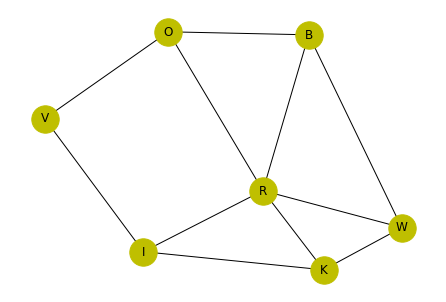

In [30]:
graph.plot({stad: [ll[1], ll[0]] for stad, ll in latlon.items()})

Laten we nu eens DFS toepassen. We houden in ons achterhoofd dat de steden oplopend alfabetisch worden gesorteerd bij het creëren van de child nodes.

In [31]:
graph.search(DFS, print_queue=True)

Initial queue:
[K]

Iteration 1
Path removed from queue:
K
New paths:
[KI,KR,KW]
Paths in queue:
[KI,KR,KW]

Iteration 2
Path removed from queue:
KI
New paths:
[KIR,KIV]
Paths in queue:
[KIR,KIV,KR,KW]

Iteration 3
Path removed from queue:
KIR
New paths:
[KIRB,KIRO,KIRW]
Paths in queue:
[KIRB,KIRO,KIRW,KIV,KR,KW]

Path to goal found in new paths:
KIRB

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0004620552062988281 seconds
Number of iterations: 3
Maximum length of queue: 4


KIRB

DFS vindt niet de korste route maar gaat via Ieper en Roeselare. Wat gebeurt er als we de steden aflopenend alfabetisch gesorteerd doorlopen?

In [32]:
graph.search(DFS, 
             rules=ProductionRule.create_all(graph, reverse=True), 
             print_queue=True)

Initial queue:
[K]

Iteration 1
Path removed from queue:
K
New paths:
[KW,KR,KI]
Paths in queue:
[KW,KR,KI]

Iteration 2
Path removed from queue:
KW
New paths:
[KWR,KWB]
Paths in queue:
[KWR,KWB,KR,KI]

Path to goal found in new paths:
KWB

ALGORITHM: Depth-first search
RESULT: SUCCES
Elapsed time: 0.0002751350402832031 seconds
Number of iterations: 2
Maximum length of queue: 3


KWB

Dan vinden we wel één van de kortste routes. Maar het is niet de kortste route die BFS vindt.

In [33]:
path_to_goal = graph.search(BFS)
print("gevonden route:", path_to_goal)

ALGORITHM: Breadth-first search
RESULT: SUCCES
Elapsed time: 0.0002560615539550781 seconds
Number of iterations: 3
Maximum length of queue: 4
gevonden route: KRB


Welke kortste route vindt IDS? Dezelfde als BFS!

In [34]:
path_to_goal = graph.search(IDS, print_result=False)
print("gevonden route:", path_to_goal)

gevonden route: KRB
